<a href="https://colab.research.google.com/github/mkash96/RLA1/blob/main/RLA1_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
!pip install -q numpy scipy scikit-learn matplotlib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

# Load the Wine dataset
column_names = [
    'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]

data = pd.read_csv('/content/wine.data', header=None, names=column_names)
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values - 1  # Adjust classes to start from 0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)



Training features shape: (142, 13)
Testing features shape: (36, 13)


In [3]:

# Define the GradientBandit class
class GradientBandit:
    def __init__(self, n_arms, alpha, baseline=True):
        self.n_arms = n_arms
        self.alpha = alpha
        self.baseline = baseline
        self.preferences = np.zeros(n_arms)
        self.probabilities = np.ones(n_arms) / n_arms
        self.average_reward = 0
        self.time_step = 0

    def select_arm(self):
        self.probabilities = np.exp(self.preferences) / np.sum(np.exp(self.preferences))
        return np.random.choice(self.n_arms, p=self.probabilities)

    def update(self, chosen_arm, reward):
        self.time_step += 1
        if self.baseline:
            self.average_reward += (reward - self.average_reward) / self.time_step
        one_hot = np.zeros(self.n_arms)
        one_hot[chosen_arm] = 1
        self.preferences += self.alpha * (reward - self.average_reward) * (one_hot - self.probabilities)

# Convert target labels to rewards (1 for correct classification, 0 for incorrect)
n_classes = len(np.unique(y))
alpha = 0.1
bandit = GradientBandit(n_arms=n_classes, alpha=alpha)

def run_bandit(X_train, y_train, bandit):
    rewards = []
    for i in range(len(X_train)):
        x = X_train[i]
        true_label = y_train[i]
        chosen_arm = bandit.select_arm()
        reward = 1 if chosen_arm == true_label else 0
        bandit.update(chosen_arm, reward)
        rewards.append(reward)
    return rewards

# Run the bandit algorithm on the training data
rewards = run_bandit(X_train, y_train, bandit)
print(f"Total rewards earned: {sum(rewards)} out of {len(X_train)}")


Total rewards earned: 48 out of 142


In [4]:

def evaluate_bandit(X_test, y_test, bandit):
    rewards = []
    for i in range(len(X_test)):
        x = X_test[i]
        true_label = y_test[i]
        chosen_arm = bandit.select_arm()
        reward = 1 if chosen_arm == true_label else 0
        rewards.append(reward)
    return rewards

# Evaluate the bandit algorithm on the test data
test_rewards = evaluate_bandit(X_test, y_test, bandit)
print(f"Test rewards earned: {sum(test_rewards)} out of {len(X_test)}")


Test rewards earned: 16 out of 36


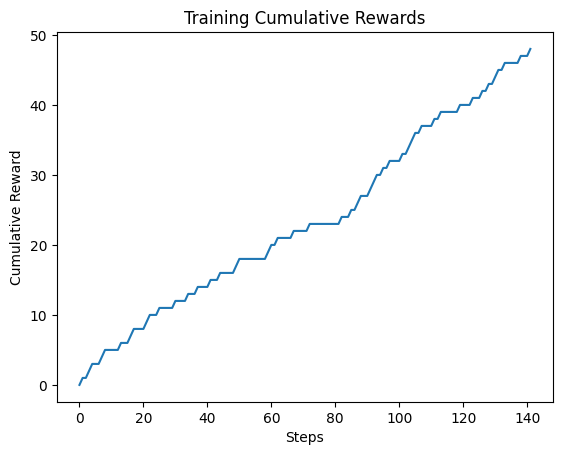

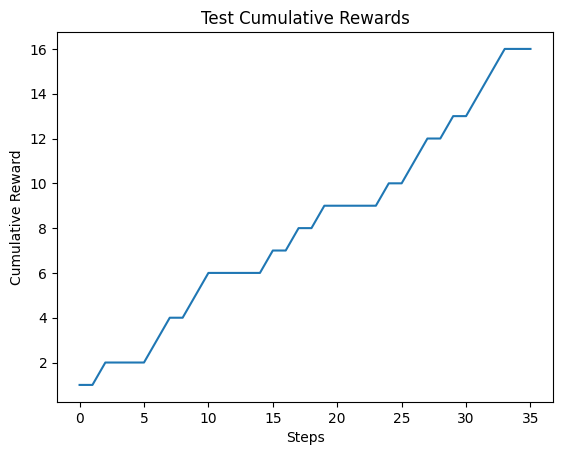

In [5]:

# Plot cumulative rewards over time
cumulative_rewards = np.cumsum(rewards)
plt.plot(cumulative_rewards)
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.title('Training Cumulative Rewards')
plt.show()

# Plot test cumulative rewards
cumulative_test_rewards = np.cumsum(test_rewards)
plt.plot(cumulative_test_rewards)
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.title('Test Cumulative Rewards')
plt.show()